In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_1 = pd.read_csv('m_kleber_all_games_data.csv')
df_2 = pd.read_csv('maxi_kleber_series_games(jazz_gsw)_data.csv')

In [4]:
df_1['misses/count_binary'] = np.where(df_1['misses/count'] == 'makes', 1, 0)
df_2['misses/count_binary'] = np.where(df_2['misses/count'] == 'makes', 1, 0)

In [5]:
# df.shape
df_to_use_1 = df_1[df_1['basket_type'] != 'free']
df_to_use_2 = df_2[df_2['basket_type'] != 'free']

In [6]:
df_to_use_1['basket_type'].value_counts()

3-pt    28
2-pt    15
Name: basket_type, dtype: int64

In [7]:
# df_2['basket_type'].value_counts()

In [8]:
combine_df = pd.concat([df_to_use_1, df_to_use_2])
combine_df['oponent_team'].fillna('suns', inplace=True)

In [9]:
# dummy_streak_df = pd.crosstab(dummy['seq'], dummy['streak'])
# dummy_streak_df = dummy_streak_df.reset_index()
# dummy_streak_df['Total'] = dummy_streak_df.sum(axis = 1)
# dummy_streak_df

In [10]:
combine_df['streak'] = combine_df['misses/count_binary'].groupby((combine_df['misses/count_binary'] != combine_df.groupby(['Series Game', 'oponent_team'])['misses/count_binary'].shift()).cumsum()).cumcount() + 1

In [11]:
# combine_df[['Series Game', 'quarter', 'misses/count', 'streak']]

In [12]:
cross_df = pd.crosstab(combine_df['misses/count'], combine_df['Series Game'])
cross_df = cross_df.reset_index()
cross_df['Total'] = cross_df.sum(axis = 1)
cross_df

Series Game,misses/count,1,2,3,4,5,6,7,Total
0,makes,9,12,12,10,4,6,1,54
1,misses,11,10,9,7,8,7,0,52


In [13]:
cross_streak_df = pd.crosstab(combine_df['misses/count'], combine_df['streak'])
cross_streak_df = cross_streak_df.reset_index()
cross_streak_df['Total'] = cross_streak_df.sum(axis = 1)
cross_streak_df

streak,misses/count,1,2,3,4,5,Total
0,makes,31,11,7,5,0,54
1,misses,31,12,5,3,1,52


In [14]:
makes_prob = cross_streak_df[[1,2,3,4,5]].loc[0] / 54
misses_prob = cross_streak_df[[1,2,3,4,5]].loc[1] / 52

prob_df = pd.DataFrame()
prob_df['makes_prob'] = makes_prob
prob_df['misses_prob'] = misses_prob
prob_df = prob_df.reset_index()

In [15]:
11/31

0.3548387096774194

In [16]:
prob_df['converg_prob'] = [0.574, 0.355, 0.637, 0.714, 0.0]
new_row = {'converg_prob' : 0, 'makes_prob': 0, 'misses_prob': 0, 'streak': 6}

In [17]:
prob_df = prob_df.append(new_row, ignore_index=True)

In [18]:
prob_df

,streak,makes_prob,misses_prob,converg_prob
0,1,0.574074,0.596154,0.574
1,2,0.203704,0.230769,0.355
2,3,0.129630,0.096154,0.637
3,4,0.092593,0.057692,0.714
4,5,0.000000,0.019231,0.000
5,6,0.000000,0.000000,0.000


F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

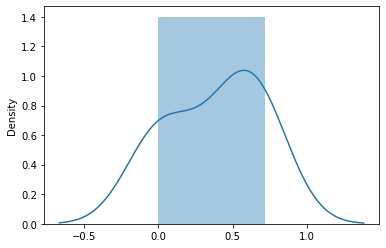

In [19]:
sns.distplot(x = prob_df['converg_prob'])

In [20]:
54/106

0.5094339622641509

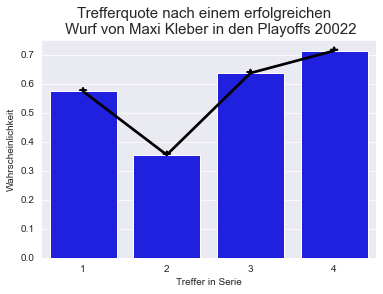

In [24]:
sns.set_style('darkgrid')
ax = sns.barplot(x = 'streak', y = 'converg_prob', data = prob_df[prob_df['streak'] <= 4], color = 'b')
ax = sns.pointplot(x = 'streak', y = 'converg_prob', data = prob_df[prob_df['streak'] <= 4], color = 'black', markers = '*')
ax.set(xlabel='Treffer in Serie', ylabel='Wahrscheinlichkeit')
ax.set_title('Trefferquote nach einem erfolgreichen  \n Wurf von Maxi Kleber in den Playoffs 20022', fontsize= 15)
# plt.show()
plt.savefig('maxi.pdf', bbox_inches='tight', dpi = 1200)

<AxesSubplot:xlabel='streak', ylabel='converg_prob'>

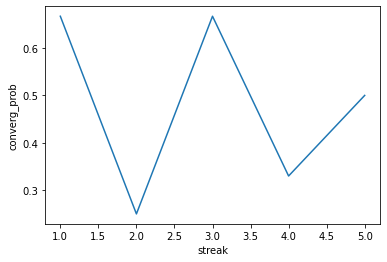

In [64]:
sns.lineplot(x = 'streak', y = 'converg_prob', err_style='bars', data = prob_df)

In [14]:
combine_df[combine_df['misses/count'] == 'makes'][['Series Game', 'quarter', 'misses/count', 'streak']]

,Series Game,quarter,misses/count,streak
0,1,1.0,makes,1
1,1,1.0,makes,2
2,1,1.0,makes,3
3,1,2.0,makes,4
5,1,2.0,makes,1
13,1,4.0,makes,1
14,2,1.0,makes,1
16,2,1.0,makes,1
22,2,3.0,makes,1
23,3,1.0,makes,1


In [32]:
import matplotlib.pyplot as plt

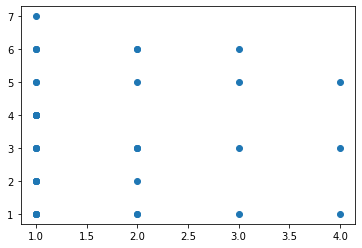

In [37]:
plt.scatter(df_to_use['streak'], df_to_use['Series Game'])

In [2]:
smart_df = pd.read_csv('m_smart_all_series_games_data.csv')

In [10]:
smart_df['misses/count_binary'] = np.where(smart_df['misses/count'] == 'makes', 1, 0)
three_pt_df = smart_df[smart_df['basket_type'] == '3-pt']

In [95]:
smart_df['streak'] = smart_df['misses/count_binary'].groupby((smart_df['misses/count_binary'] != smart_df.groupby(['Series Game', 'quarter'])['misses/count_binary'].shift()).cumsum()).cumcount() + 1

In [34]:
cross_df = pd.crosstab(smart_df['misses/count'], smart_df['Series Game'])
cross_df = cross_df.reset_index()
cross_df['Total'] = cross_df.sum(axis = 1)

In [69]:
cross_df

Series Game,misses/count,1,3,4,5,6,7,Total
0,makes,6,7,8,6,8,8,43
1,misses,9,9,5,5,8,8,44


In [91]:
makes_prob = cross_df[[1,3,4,5,6,7]].loc[0] / 43
misses_prob = cross_df[[1,3,4,5,6,7]].loc[1] / 44

prob_df = pd.DataFrame()
prob_df['makes_prob'] = makes_prob
prob_df['misses_prob'] = misses_prob
prob_df = prob_df.reset_index()

In [112]:
prob_df

,Series Game,makes_prob,misses_prob
0,1,0.139535,0.204545
1,3,0.162791,0.204545
2,4,0.186047,0.113636
3,5,0.139535,0.113636
4,6,0.186047,0.181818
5,7,0.186047,0.181818


In [96]:
cross_df = pd.crosstab(smart_df['misses/count'], smart_df['streak'])
cross_df = cross_df.reset_index()
cross_df['Total'] = cross_df.sum(axis = 1)

In [98]:
makes_prob = cross_df[[1,2,3,4]].loc[0] / 43
misses_prob = cross_df[[1,2,3,4]].loc[1] / 44

streak_prob_df = pd.DataFrame()
streak_prob_df['makes_prob'] = makes_prob
streak_prob_df['misses_prob'] = misses_prob

In [101]:
streak_prob_df = streak_prob_df.reset_index()

In [104]:
streak_prob_df

,streak,makes_prob,misses_prob
0,1,0.581395,0.681818
1,2,0.255814,0.272727
2,3,0.116279,0.045455
3,4,0.046512,0.000000


<AxesSubplot:xlabel='makes_prob', ylabel='Density'>

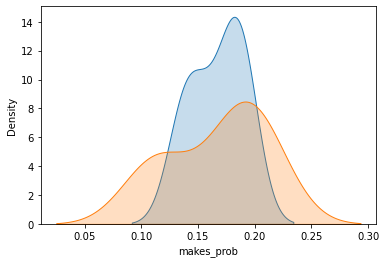

In [126]:
sns.kdeplot(prob_df['makes_prob'], shade=True)
sns.kdeplot(prob_df['misses_prob'], shade=True)

<AxesSubplot:xlabel='streak', ylabel='makes_prob'>

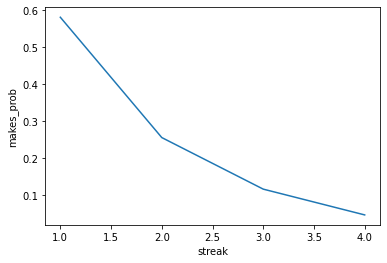

In [128]:
sns.lineplot(x = 'streak', y = 'makes_prob', err_style="bars", data = streak_prob_df)

# sns.lineplot(x = prob_df['Series Game'], y = prob_df['misses_prob'])

<AxesSubplot:xlabel='streak', ylabel='makes_prob'>

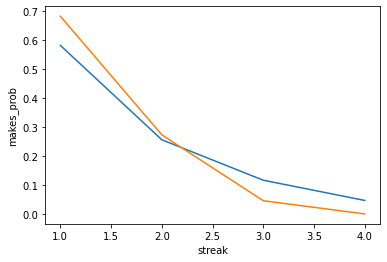

In [106]:
sns.lineplot(x = streak_prob_df['streak'], y = streak_prob_df['makes_prob'])
sns.lineplot(x = streak_prob_df['streak'], y = streak_prob_df['misses_prob'])

In [25]:
smart_df['misses/count'].value_counts()

misses    44
makes     43
Name: misses/count, dtype: int64

In [18]:
three_pt_df[['Series Game', 'quarter', 'misses/count', 'streak']]

,Series Game,quarter,misses/count,streak
0,1,1.0,makes,1
3,1,1.0,misses,1
6,1,2.0,misses,1
7,1,2.0,misses,2
8,1,3.0,misses,1
10,1,3.0,misses,2
21,3,3.0,misses,1
22,3,3.0,makes,1
23,3,3.0,misses,1
27,3,4.0,misses,1
